<a href="https://colab.research.google.com/github/krldlamini/edm_brazildengue/blob/main/Seasonal_Surrogates/notebooks/Rho_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Determing significance

This file performs a randomisation test of significance to test the null hypothesis that seasonal forcing impacts the cross mapping correlation coefficient (ρ)

# Importing packages

In [5]:
!pip install pyEDM

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 22.0 MB/s eta 0:00:00


In [67]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.integrate import odeint

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Reading in Data

In [83]:
max_path = 'drive/MyDrive/Dengue_BR/Output_Documents/Surrogate_Data/MaxTempCCM_Surr.csv'
maxtemp_ccm = pd.read_csv(max_path, delimiter = ';')

min_path = 'drive/MyDrive/Dengue_BR/Output_Documents/Surrogate_Data/MinTempCCM_Surr.csv'
mintemp_ccm = pd.read_csv(min_path, delimiter = ';')

rain_path = 'drive/MyDrive/Dengue_BR/Output_Documents/Surrogate_Data/RainCCM_Surr.csv'
totrain_ccm = pd.read_csv(rain_path, delimiter = ';')

# Get average rho values for observed data and for the surrogates

In [84]:
max_observed = maxtemp_ccm.iloc[:, 1:2]
min_observed = mintemp_ccm.iloc[:, 1:2]
rain_observed = totrain_ccm.iloc[:, 1:2]

obs_pdf = pd.concat([max_observed, min_observed, rain_observed], axis=1)
obs_meanrho = obs_pdf.mean(axis=1)

In [85]:
# Max temperature
first_cols = maxtemp_ccm.iloc[:, :1]
max_surr = maxtemp_ccm.iloc[:, 2:] # select surrogates
max_meanrho = max_surr.mean(axis=1)

# Min temperature
min_surr = mintemp_ccm.iloc[:, 2:] # select surrogates
min_meanrho = min_surr.mean(axis=1)

# Tot precipitation
rain_surr = totrain_ccm.iloc[:, 2:] # select surrogates
rain_meanrho = rain_surr.mean(axis=1)

# Final rho dataframe
rho_ccm_df = pd.concat([first_cols,
                        obs_meanrho.rename('Observed_(Mean ρ)'),
                        max_meanrho.rename('Max_Temp_(Mean ρ)'),
                        min_meanrho.rename('Min_Temp_(Mean ρ)'),
                        rain_meanrho.rename('Precipitation_(Mean ρ)')], axis=1)


# Assess significance

In [95]:
test_max = max_observed['Observed']
test_min = min_observed['Observed']
test_rain = rain_observed['Observed']

In [114]:
len(rain_meanrho)

77

In [115]:
max_pvalue = (sum(test_max < max_meanrho) +1) / (len(max_meanrho) +1)
max_pvalue

0.8589743589743589

In [116]:
min_pvalue = (sum(test_min < min_meanrho) + 1) / (len(min_meanrho) + 1)
min_pvalue

0.9358974358974359

In [117]:
rain_pvalue = (sum(test_rain < rain_meanrho) + 1) / (len(rain_meanrho) + 1)
rain_pvalue

0.1282051282051282

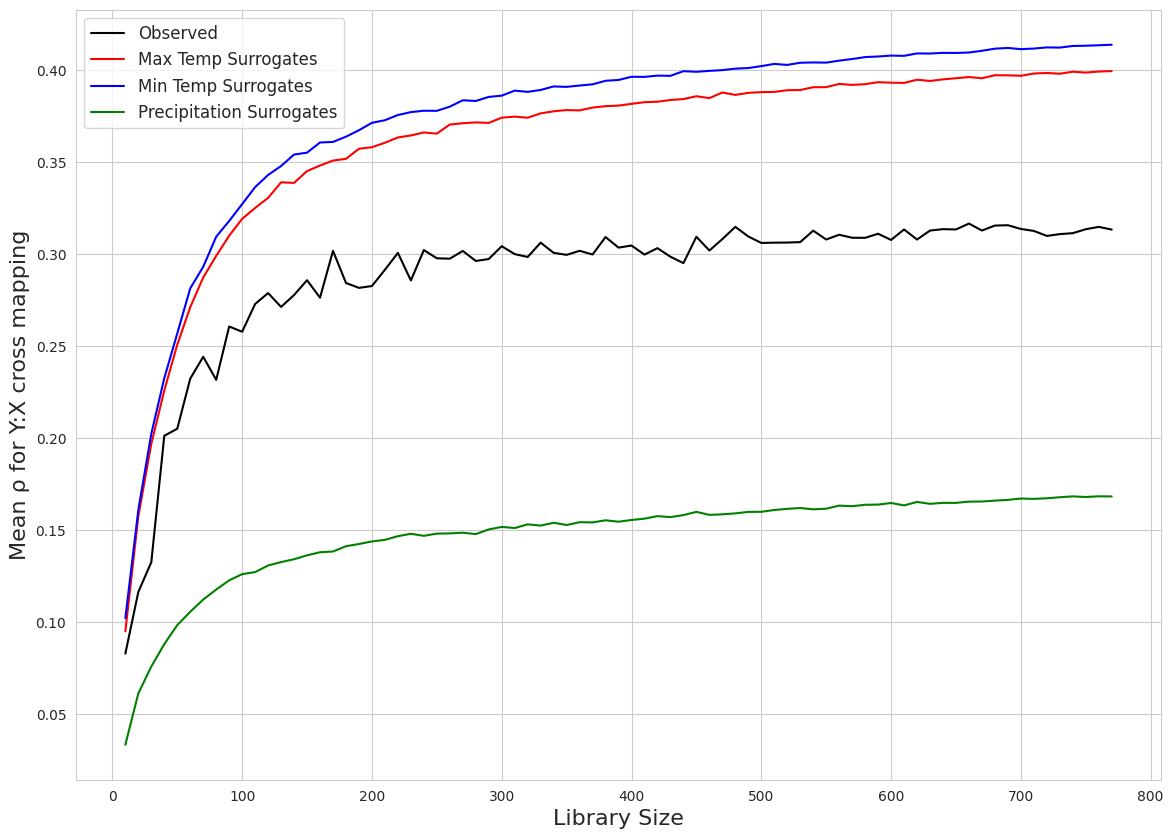

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Seaborn settings
sns.set_style("whitegrid")

# Create a larger figure
plt.figure(figsize=(14, 10))

# Create line plots
sns.lineplot(x='LibSize', y='Observed_(Mean ρ)', data = rho_ccm_df, color='black', label='Observed')
sns.lineplot(x='LibSize', y='Max_Temp_(Mean ρ)', data=rho_ccm_df, color='red', label='Max Temp Surrogates')
sns.lineplot(x='LibSize', y='Min_Temp_(Mean ρ)', data=rho_ccm_df, color='blue', label='Min Temp Surrogates')
sns.lineplot(x='LibSize', y='Precipitation_(Mean ρ)', data=rho_ccm_df, color='green', label='Precipitation Surrogates')

# Customize the title and labels
#plt.title('Mean ρ for Different Variables Against Library Size', fontsize=20)
plt.xlabel('Library Size', fontsize=16)
plt.ylabel('Mean ρ for Y:X cross mapping', fontsize=16)

# Customize the legend
plt.legend(fontsize=12)

# Display the plot
plt.show()
